In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df = pd.read_csv('Advanced_feat_data.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_n_words,q2_n_words,word_common,word_total,...,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,first_word_eq,last_word_eq,abs_len_diff,mean_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,14.0,12.0,11.0,12.0,...,0.833333,0.714286,1.0,0.857143,0.916667,0.785714,1.0,0.0,2.0,13.0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,8.0,13.0,4.0,14.0,...,0.500000,0.222222,0.5,0.500000,0.500000,0.307692,1.0,0.0,5.0,10.5
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,14.0,10.0,4.0,20.0,...,0.400000,0.333333,0.4,0.250000,0.400000,0.285714,1.0,0.0,4.0,12.0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,11.0,9.0,0.0,19.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.0,10.0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt wat,0,13.0,7.0,4.0,16.0,...,0.200000,0.100000,1.0,0.666667,0.428571,0.230769,1.0,0.0,6.0,10.0


In [ ]:
df.shape

(404351, 34)

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

id                        0
qid1                      0
qid2                      0
question1                15
question2                 6
is_duplicate              0
q1_n_words                0
q2_n_words                0
word_common               0
word_total                0
q1len                     0
q2len                     0
word_share                0
freq_qid1                 0
freq_qid2                 0
freq_q1+freq_q2           0
freq_q1-freq_q2           0
fuzzy_ratio               0
fuzzy_partial_ratio       0
token_sort_ratio          0
token_set_ratio           0
common_word_count         0
common_stop_count         0
common_token_count        0
cwc_min                  98
cwc_max                  13
csc_min                1681
csc_max                  97
ctc_min                   0
ctc_max                   0
first_word_eq             0
last_word_eq              0
abs_len_diff              0
mean_len                  0
dtype: int64


In [ ]:
df = df.dropna()
print("Shape of DataFrame after removing nulls:", df.shape)

Shape of DataFrame after removing nulls: (402572, 34)


In [ ]:
df_duplicates = df[df['is_duplicate']==1]
df_nonduplicates = df[df['is_duplicate']==0]

# **Plotting Word Clouds**
we can observe most and least frequently occuring words for both the class label

In [ ]:
# converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}}

p = np.dstack([df_duplicates['question1'], df_duplicates['question2']]).flatten()
n = np.dstack([df_nonduplicates['question1'], df_nonduplicates['question2']]).flatten()

print("Number of data points in class 1 (duplicated pairs) :",len(p))
print("Number of data points in class 0 (nonduplicated pairs) :",len(n))

#saving a array to a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicated pairs) : 298006
Number of data points in class 0 (nonduplicated pairs) : 507138


In [ ]:
# reading the text file and removing the stopwords
d = os.path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt'), encoding='utf-8').read()
textn_w = open(path.join(d, 'train_n.txt'), encoding='utf-8').read()
stopwords = set( STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.add("not")
stopwords.remove("no")
stopwords.remove("like")
print("Total number of words in duplicate pair fo question: ",len(textp_w))
print("Total number of words in non-duplicate pair fo question: ",len(textn_w))

Total number of words in duplicate pair fo question:  15332401
Total number of words in non-duplicate pair fo question:  31502046


word count for duplicated question pair


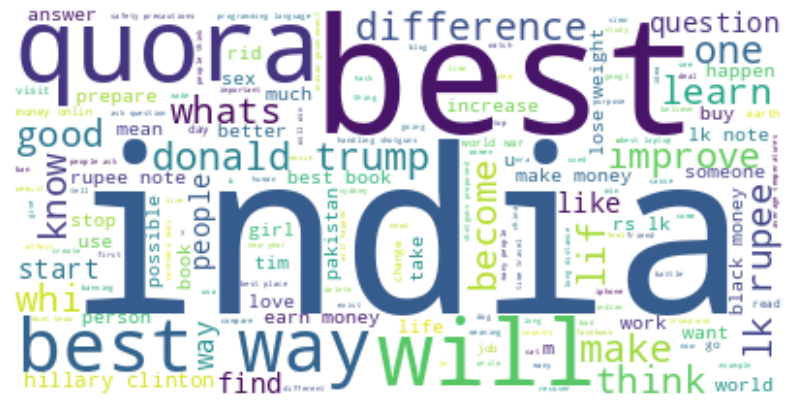

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
plt.figure(figsize=(10,10))
print("word count for duplicated question pair")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

word count for nonduplicate question pair


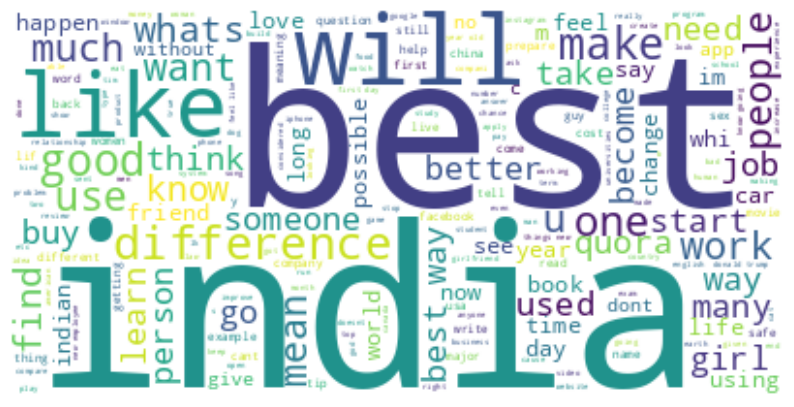

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textn_w), stopwords=stopwords)
wc.generate(textn_w)
plt.figure(figsize=(10,10))
print("word count for nonduplicate question pair")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Pair plots of features** ['ctc_min','cwc_min','csc_min','token_sort_ratio']

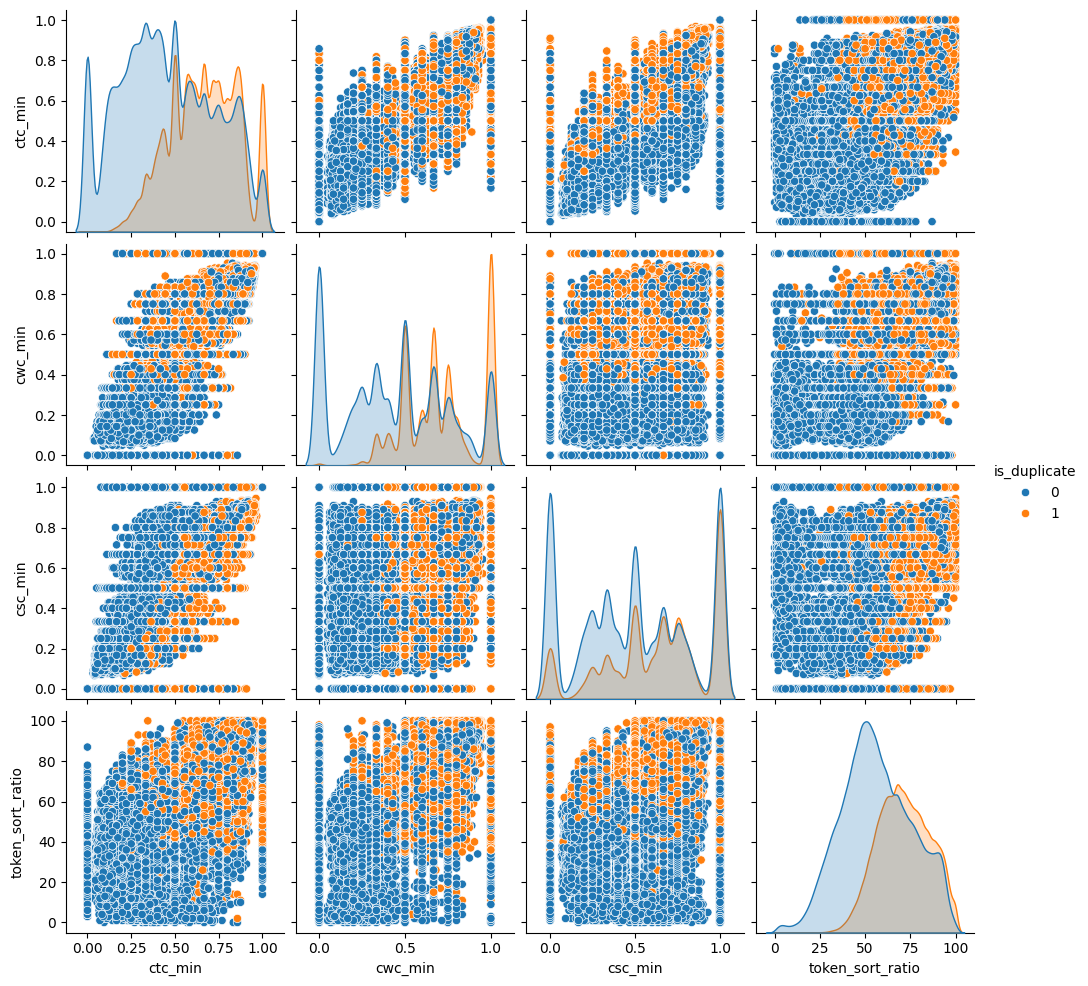

In [ ]:
n = df.shape[0]
sns.pairplot(df[['ctc_min','cwc_min','csc_min','token_sort_ratio','is_duplicate']][0:n], diag_kind='kde',hue='is_duplicate')
plt.show()

<ipython-input-32-ac1986f7c13f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[x]== 1.0][y][0:], label="1", color='b')
<ipython-input-32-ac1986f7c13f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[x]== 0.0][y][0:], label = "0",color='g')


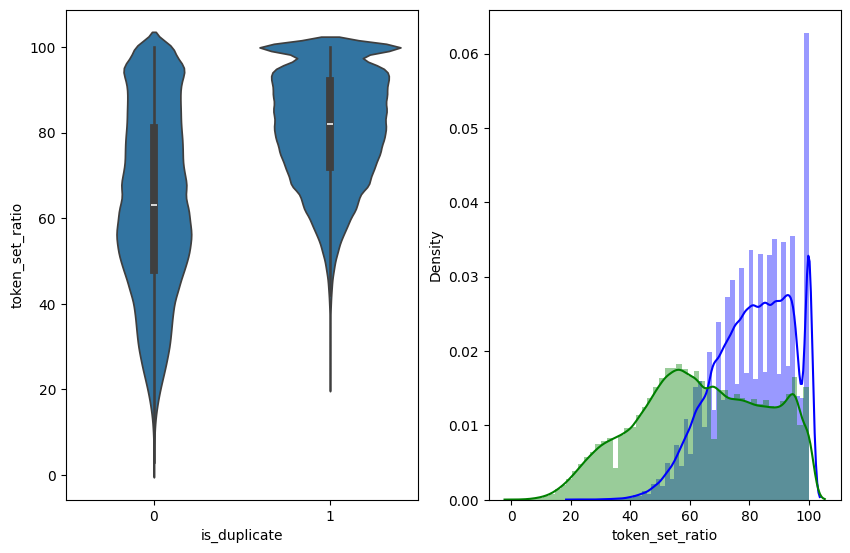

In [ ]:
x = 'is_duplicate'
y = 'token_set_ratio'
plt.figure(figsize=(10,14))

plt.subplot(2,2,1)
sns.violinplot(x=x,y=y,data=df[0:n])

plt.subplot(2,2,2)
sns.distplot(df[df[x]== 1.0][y][0:], label="1", color='b')
sns.distplot(df[df[x]== 0.0][y][0:], label = "0",color='g')
plt.show()

<ipython-input-33-697355e7fab5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[x]== 1.0][y][0:], label="1", color='b')
<ipython-input-33-697355e7fab5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[x]== 0.0][y][0:], label = "0",color='g')


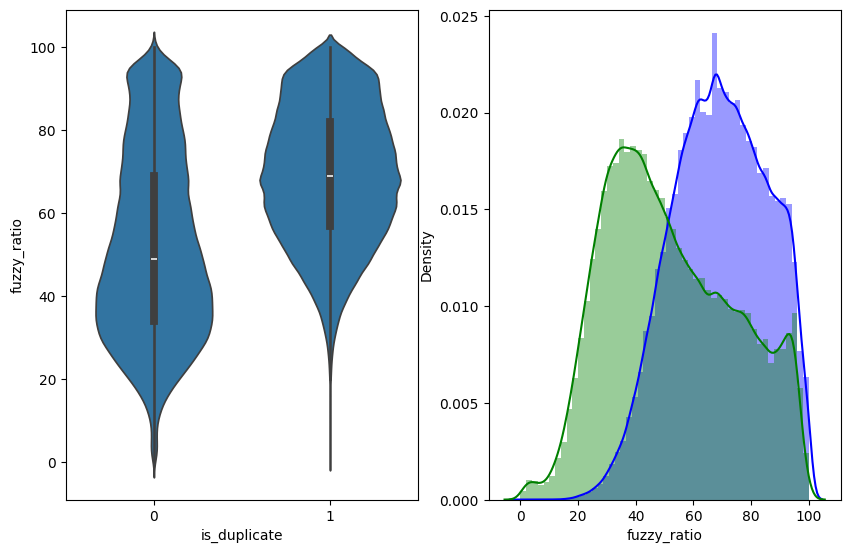

In [ ]:
 x = 'is_duplicate'
y = 'fuzzy_ratio'
plt.figure(figsize=(10,14))

plt.subplot(2,2,1)
sns.violinplot(x=x,y=y,data=df[0:n])

plt.subplot(2,2,2)
sns.distplot(df[df[x]== 1.0][y][0:], label="1", color='b')
sns.distplot(df[df[x]== 0.0][y][0:], label = "0",color='g')
plt.show()

# **Apply TSNE**

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
dfp_subsampled = df[0:5000]
x = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'first_word_eq',
       'last_word_eq', 'abs_len_diff', 'mean_len', 'fuzzy_ratio', 'fuzzy_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [ ]:
tsne2d = TSNE(
    n_components=2,
    init='random', #pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(x)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.015s...
[t-SNE] Computed neighbors for 5000 samples in 0.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.129943
[t-SNE] Computed conditional probabilities in 0.184s
[t-SNE] Iteration 50: error = 86.2094193, gradient norm = 0.0907615 (50 iterations in 3.482s)
[t-SNE] Iteration 100: error = 70.6640167, gradient norm = 0.0133443 (50 iterations in 2.430s)
[t-SNE] Iteration 150: error = 68.4048920, gradient norm = 0.0076342 (50 iterations in 2.540s)
[t-SNE] Iteration 200: error = 67.4629288, gradient norm = 0.0054715 (50 iterations in 3.147s)
[t-SNE] Iteration 250: error = 66.9599075, gradient norm = 0.0043605

In [ ]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y' : tsne2d[:,1], 'label': y})

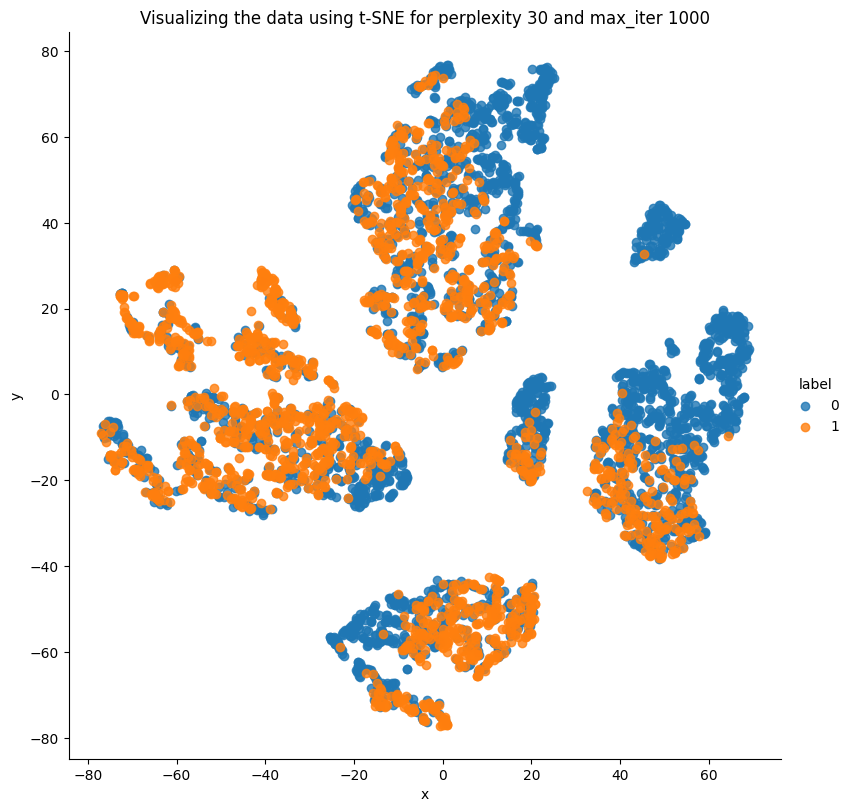

In [ ]:
sns.lmplot(x='x', y='y', hue='label', data=df, fit_reg=False, height=8)
plt.title('Visualizing the data using t-SNE for perplexity {} and max_iter {}'.format(30,1000))
plt.show()